# aufgabe 1

Du hast folgende Daten vorliegen: Auszug aus den Top 250 bewerteten Filmen und die Informationen zu Erscheinungsjahr, Laufzeit, Genre, Director, Schauspieler sowie die Information, ob Eric den Film gesehen (1 = gesehen, 0 = nicht gesehen) hat und ob er ihn richtig gut gefunden hat (1 = richtig gut, 0 = nicht richtig gut). Erstelle aus diesen Daten eine komplette Fallanalyse und bereite eine Präsentation zu den Top 250 Filmen selbst vor, zu den Filmen die Eric gesehen hat und zu den Filmen, die Eric gut fand. Unter anderem folgende Fragen könnten hierbei beantwortet werden:

• Welches Genre ist wie häufig vertreten? • Gibt es ein Lieblingsgenre? • Gibt es Besonderheiten bei den vertretenen Jahresangaben? • Gibt es Unterschiede zwischen den Top 250 selbst und den Eric-Spalten? • Sind kürzere Filme oder längere Filme beliebt? • Sind bestimmte Schauspieler besonders häufig vertreten?

Es sind für deine Kreativität keine Grenzen gesetzt. Wichtig ist: DU musst erklären können, was du wie gemacht hast, warum du etwas nicht gemacht hast und welche Information du daraus extrahieren wolltest. In der Präsentation kannst du Grafiken, bedingte Formatierungen, Texte und Bilder so verwenden, wie du möchtest!

Folgende Frage muss beantwortet werden: Nach Durchsicht und unter Einbezug ALLER Informationen über Erics Top Filme: Welchen Film von der Top 250 Liste, die Eric noch nicht gesehen hat, sollte er sich unbedingt anschauen? Mit dieser Folie / Information sollte deine Präsentation abschließen!

In [10]:
#die datei lesen
import pandas as pd 
import numpy as np
datei=pd.read_excel("Aufgabe 1 - IMDB Top 250.xlsx")
df=pd.DataFrame(datei)
df.head()

,Ranking,Erics Top Filme,Gesehen,Title,Date,RunTime,Genre,Rating,Director,Cast1,Cast2,Cast3,Cast4
0,1,1.0,1,The Shawshank Redemption,1994,142,Drama,93,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,2,0.0,1,The Godfather,1972,175,"Crime, Drama",92,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,3,0.0,1,The Godfather: Part II,1974,202,"Crime, Drama",90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
3,4,1.0,1,The Dark Knight,2008,152,"Action, Crime, Drama",90,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
4,5,1.0,1,12 Angry Men,1957,96,"Crime, Drama",90,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [5]:
#welche type hat jeder spalte
df.dtypes

Ranking              int64
Erics Top Filme    float64
Gesehen              int64
Title               object
Date                 int64
RunTime              int64
Genre               object
Rating               int64
Director            object
Cast1               object
Cast2               object
Cast3               object
Cast4               object
dtype: object

In [24]:
#wie viel spalte & zeile hat dataframe
df.shape

(250, 13)

In [6]:
#name der spalte kenen
df.columns

Index(['Ranking', 'Erics Top Filme', 'Gesehen', 'Title', 'Date', 'RunTime',
       'Genre', 'Rating', 'Director', 'Cast1', 'Cast2', 'Cast3', 'Cast4'],
      dtype='object')

In [15]:
eric["Title"]==1

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Name: Title, Length: 250, dtype: bool

In [2]:
#wie viel Fielme haben Ihm gefahllen
len(df.loc[df["Erics Top Filme"]==1])

46

In [3]:
#wie viel Fielme haben Ihm nicht gafehllen
len(df.loc[df["Erics Top Filme"]==0])

77

In [4]:
#wie viel Filme hat Eric gesen 
len(df.loc[df["Gesehen"]==1])

123

In [186]:
#wie viel Filme hat Eric nicht gesen
len(df.loc[df["Gesehen"]==0])

127

### punkt eins(	Welches Genre ist wie häufig vertreten? )


In [18]:
#spalte Genre lesen und als dataframe speichern
genree=df['Genre'].value_counts()
genree=genree.to_frame()
genreeh=genree.head(10)
genreeh

,Genre
Drama,20
"Crime, Drama",14
"Biography, Drama, History",9
"Crime, Drama, Mystery",9
"Animation, Adventure, Comedy",8
"Drama, War",8
"Drama, Romance",7
"Action, Crime, Drama",6
"Action, Adventure, Drama",6
"Crime, Drama, Thriller",6


## punkt 2(Gibt es ein Lieblingsgenre? )

<AxesSubplot:>

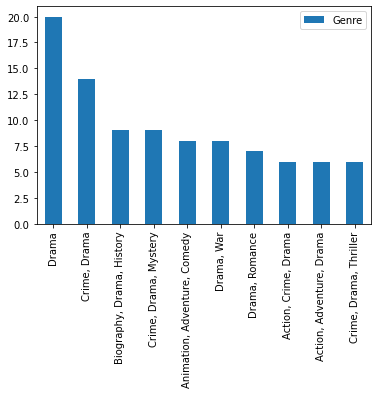

In [25]:
#die liblingsgenre zeigen
genreeh.plot.bar()

In [4]:
#welche Genre ist mehr gesehen
genvertr=df[["Genre","Gesehen"]]

drama=genvertr[genvertr.Genre.str.match('.[Drama]')]





In [5]:
len(drama)

106

## punkt 3(Gibt es Besonderheiten bei den vertretenen Jahresangaben? )

In [75]:
#die spalte date lesen und ais datafram speichern um wissen wie viel mal hat getret
jahr=df["Date"].value_counts()
jahr_fram=jahr.to_frame()
jahr_fram.head()

,Date
1995,8
1957,7
2004,6
2009,6
2018,6


In [21]:
#die beste 5 Filme 
rattitel=df[["Title","Rating"]]
reiting=rattitel.sort_values(by=["Rating"])

best=reiting.tail(5)
best

,Title,Rating
3,The Dark Knight,90
2,The Godfather: Part II,90
1,The Godfather,92
139,Jai Bhim,93
0,The Shawshank Redemption,93


## punkt 5(Sind kürzere Filme oder längere Filme beliebt? )

In [33]:
#die lengste 5 Filme und als geumetre zeigen
lang=df[["Title","RunTime"]]

lang=lang.sort_values(by=["RunTime"])

lang.set_index("Title",inplace=True)
lang
funf_lengst= lang.tail(5)
funf_lengst

,RunTime
Title,
Ben-Hur,212
Lawrence of Arabia,228
Once Upon a Time in America,229
Gone with the Wind,238
Gangs of Wasseypur,321


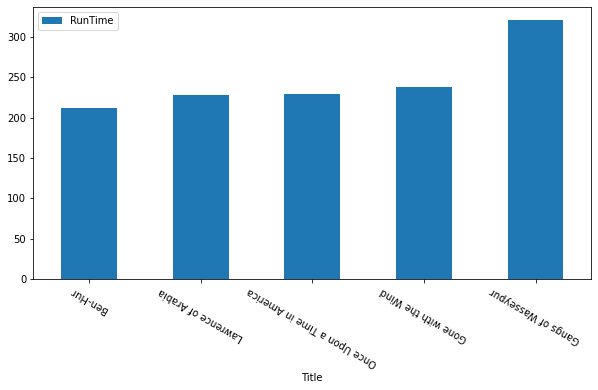

In [38]:
funf_plot=funf_lengst.plot.bar( figsize=(10, 5), rot=150)

In [35]:
#die kürzeste 5 Filme 
kurtz=df[["Title","RunTime"]]
kurtz=kurtz.sort_values(by=["RunTime"])
kurtz.set_index("Title",inplace=True)

funf_kurtze=kurtz.head(5)
funf_kurtze

,RunTime
Title,
Sherlock Jr.,45
The General,67
The Kid,68
Before Sunset,80
Toy Story,81


<AxesSubplot:xlabel='Title'>

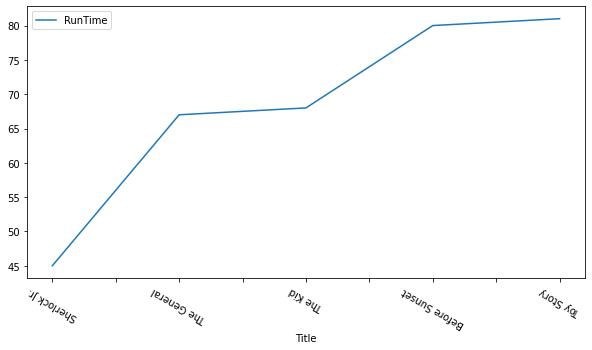

In [36]:
#ein diagram für 5 kurtze filme und als grafik zeigen
funf_kurtze.plot.line( figsize=(10, 5), rot=150)

Text(0, 0.5, 'RunTime')

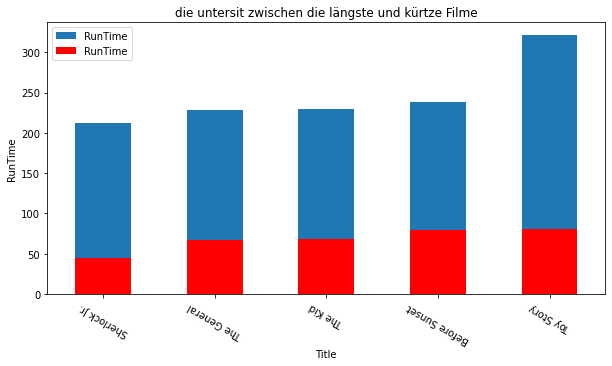

In [36]:
#unterschit zwischen 5 kürtze und 5länge filme 
import matplotlib.pyplot as plt
funf_plot=funf_lengst.plot.bar( figsize=(10, 5), rot=150)
funf_kurtze.plot.bar( figsize=(10, 5),color="r", rot=150,ax=funf_plot)
plt.title("die untersit zwischen die längste und kürtze Filme")
plt.xlabel("Title")
plt.ylabel("RunTime")

,RunTime,Rating
190,45,82
189,67,81
103,68,83
241,80,81
80,81,83
...,...,...
211,212,81
102,228,83
74,229,83
179,238,81


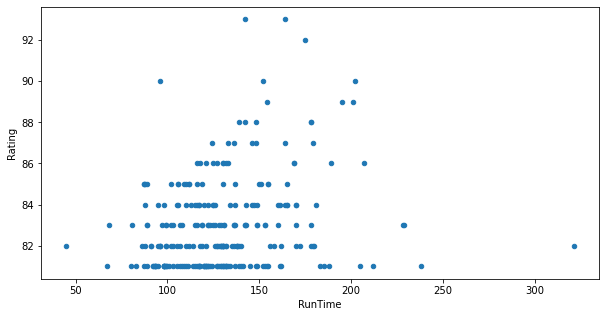

In [53]:
#die kurtze uder lange filme haben viele Rating
beliebste=df[["RunTime","Rating"]]
beliebste=beliebste.sort_values(by=["RunTime"])

beliebste.plot.scatter(x="RunTime", y="Rating",figsize=(10, 5))
beliebste
#die beliebste filme sind die zwichen ein ein stunde und 3 stunden

,Rating,Genre
,max,sum
Date,,
2012,84,"Action, Comedy, CrimeDrama, WesternDramaAction..."
2013,82,"Biography, Comedy, CrimeBiography, Drama, Hist..."
2014,86,"Comedy, Drama, ThrillerAdventure, Comedy, Crim..."
2015,81,"Drama, ThrillerAction, Adventure, Sci-FiBiogra..."
2016,84,"Animation, Drama, FantasyAction, Biography, Dr..."
2017,84,"Action, Drama, Sci-FiAnimation, Adventure, Com..."
2018,84,"Action, Adventure, Sci-FiDramaCrime, Drama, My..."
2019,86,"Action, Drama, WarAction, Biography, DramaCrim..."


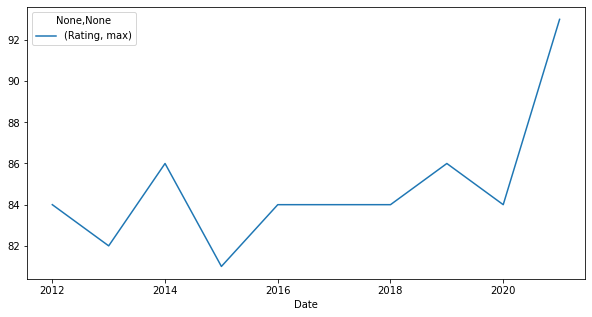

In [51]:
#welche Genre hat die hohe Rating
dataa=df[["Date","Genre","Rating"]]
datum=dataa.sort_values(by=["Date"])
datgrup=datum.groupby('Date').agg({"Rating": ["max"],"Genre":["sum"]})

dg=datgrup.tail(10)
dg.plot.line(figsize=(10, 5))
dg


<AxesSubplot:xlabel='Genre'>

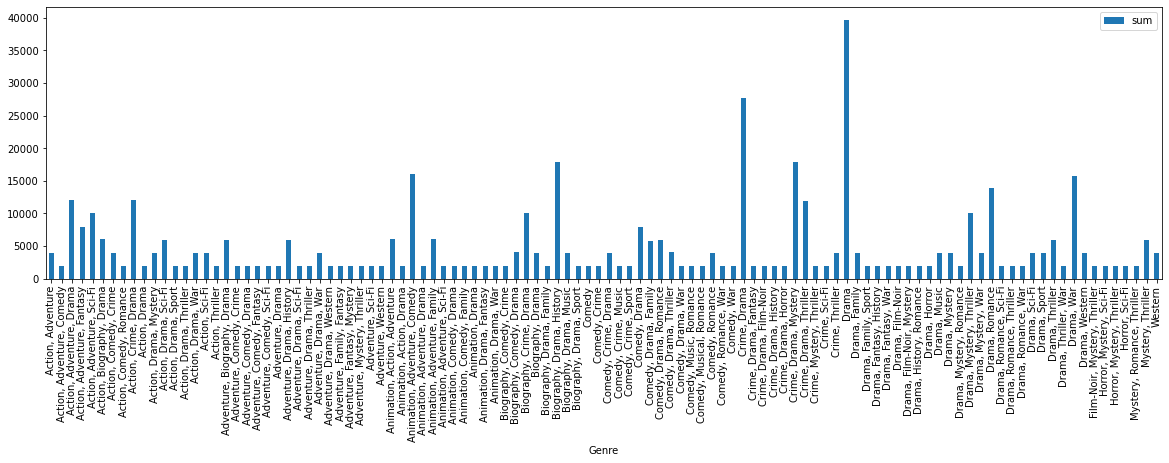

In [57]:
data5=df[["Date","Genre"]]

gd=data5.groupby('Genre').agg({"Date":["sum"]})

gd.Date.plot.bar(figsize=(20,5))

In [15]:
actors = df.filter(items=["Director","Title", "Cast1", "Cast2", "Cast3", "Cast4"])
actors

,Director,Title,Cast1,Cast2,Cast3,Cast4
0,Frank Darabont,The Shawshank Redemption,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,Francis Ford Coppola,The Godfather,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,Francis Ford Coppola,The Godfather: Part II,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
3,Christopher Nolan,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
4,Sidney Lumet,12 Angry Men,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...
245,Gillo Pontecorvo,The Battle of Algiers,Brahim Hadjadj,Jean Martin,Yacef Saadi,Samia Kerbash
246,Federico Fellini,Nights of Cabiria,Giulietta Masina,François Périer,Franca Marzi,Dorian Gray
247,Rob Reiner,The Princess Bride,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon
248,Ram Kumar,Raatchasan,Vishnu Vishal,Amala Paul,Radha Ravi,Sangili Murugan


,Cast1
Mark Hamill,3
Harrison Ford,3
Clint Eastwood,4
Toshirô Mifune,4
Christian Bale,4
James Stewart,4
Charles Chaplin,5
Leonardo DiCaprio,5
Tom Hanks,5
Robert De Niro,6


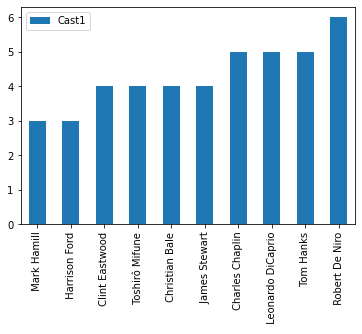

In [116]:
#die schauspile ,die mehr mal spielen und als grafik zeigen
cast1=df["Cast1"].value_counts()
castt1=cast1.to_frame()
castt1=castt1.sort_values(by=["Cast1"])
spieler=castt1.tail(10)
spieler.plot.bar()
spieler

,Cast2
Tim Allen,2
Brad Pitt,2
Ian McKellen,2
John Cleese,2
Liv Ullmann,2
Paulette Goddard,2
Ed Harris,2
Harrison Ford,3
Matt Damon,3
Robert De Niro,3


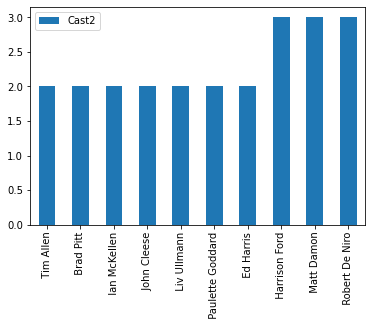

In [104]:
#erste liste für die schau
cast2=df["Cast2"].value_counts()
castt2=cast2.to_frame()
castt2=castt2.sort_values(by=["Cast2"])
spielerr=castt2.tail(10)
spielerr.plot.bar()
spielerr


,Cast3
Catherine Keener,1
Walter Connolly,1
Robert Duvall,2
Jennifer Connelly,2
Morgan Freeman,2
Tatsuya Nakadai,2
George Sanders,2
Mark Ruffalo,3
Carrie Fisher,3
Joe Pesci,3


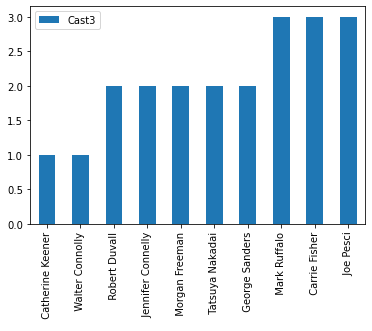

In [106]:
cast3=df["Cast3"].value_counts()
castt3=cast3.to_frame()
castt3=castt3.sort_values(by=["Cast3"])
spieler3=castt3.tail(10)
spieler3.plot.bar()
spieler3


,Cast4
Gunnar Björnstrand,2
Billy Dee Williams,2
Paul Reiser,2
Terry Gilliam,2
Christopher Plummer,2
Orlando Bloom,2
Diane Keaton,2
Olivia Williams,2
Michael Caine,2
Steve Buscemi,2


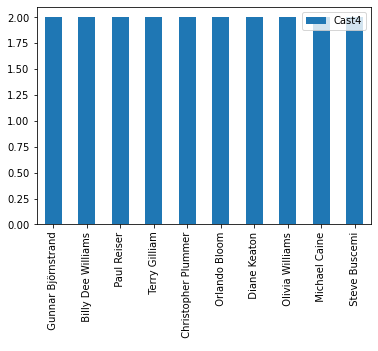

In [123]:
cast4=df["Cast4"].value_counts()
castt4=cast4.to_frame()
castt4=castt4.sort_values(by=["Cast4"])
spieler4=castt4.tail(10)
spieler4.plot.bar()
spieler4
